📊 Hotel Booking Cancellation Analysis using Python

import libray in jupyternotebook


In [18]:
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


Data loading and inspection  

In [3]:
df=pd.read_csv("hotel_bookings 2.csv")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


  Data cleaning and preprocessing

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Convertion of object to datetime 

In [ ]:


df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'],format= "mixed",dayfirst=True)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Exploratory Data Analysis (EDA)

In [8]:
for col in df.describe(include="object"):
    print(col)
    print(df[col].unique())
    print('--'*25)
   

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [26]:

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Removing all rows and columns by drop function


In [ ]:
df.drop(['agent','company'],axis=1,inplace=True)
df.dropna(inplace=True)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,month
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104,6.334123
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00,3.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00,6.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00,9.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,12.000000
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN,3.346352


Low (ADR) for better result for  Visualization

In [ ]:
df=df[df['adr']<5000]

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,103049.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,86.694107,189.266735,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,110.774841,131.655015,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


Analysis and visualizations


In [ ]:
cancel_record=df['is_canceled'].value_counts(normalize=True)


In [ ]:
cancel_record

is_canceled
0    0.629589
1    0.370411
Name: proportion, dtype: float64

Visualization of trends and patterns  


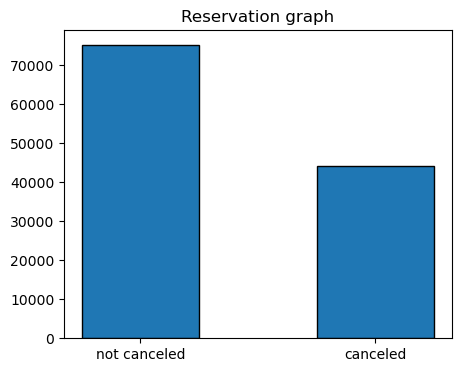

In [ ]:
plt.figure(figsize=(5,4))
plt.title('Reservation graph')
plt.bar(['not canceled','canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.5)
plt.show()

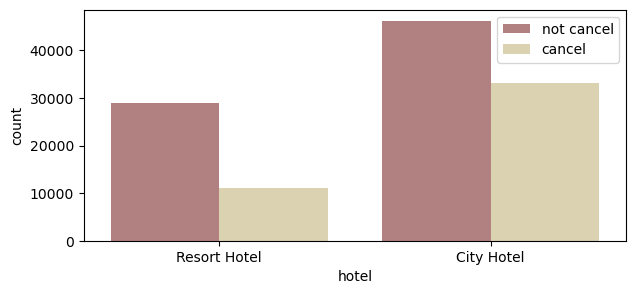

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x='hotel' , hue='is_canceled',data=df,palette='pink')
# legend_labels,_=ax1.get_legend_handles_labels()
# ax1.legend(bbox_to_anchor=(1,1))
plt.legend(['not cancel','cancel'])
plt.show()


In [ ]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [ ]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.582738
1    0.417262
Name: proportion, dtype: float64

In [ ]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

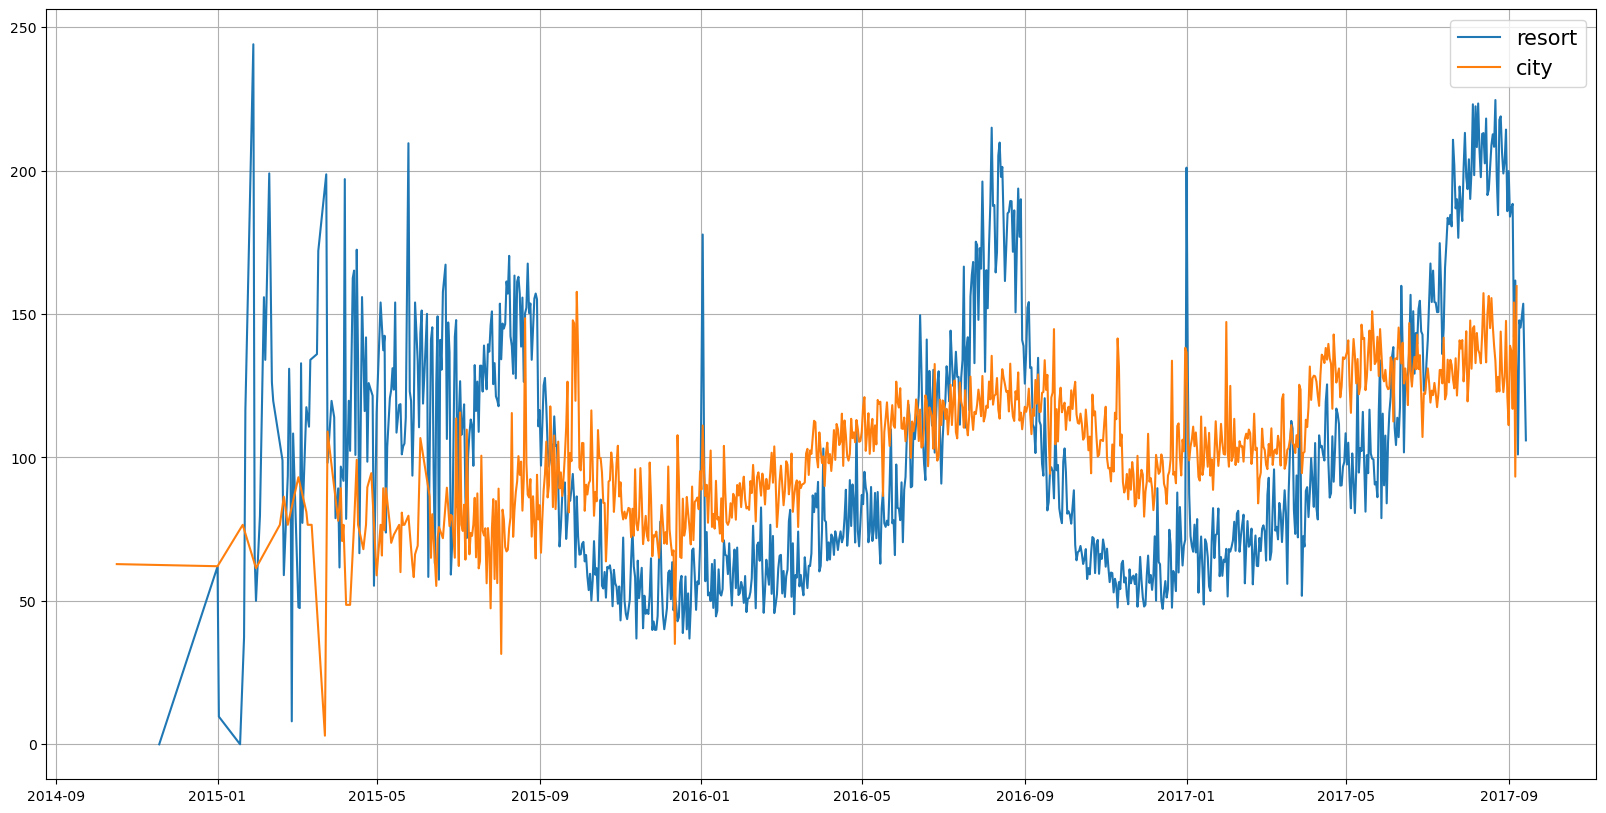

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(resort_hotel.index, resort_hotel["adr"], label='resort')
plt.plot(city_hotel.index, city_hotel["adr"], label='city')
plt.grid(True)
plt.legend(fontsize=15)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119389 entries, 2015-07-01 to 2017-09-07
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  object 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  object 
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119385 non-null  float64
 11  babies                          119389 non-null  int64  
 12  

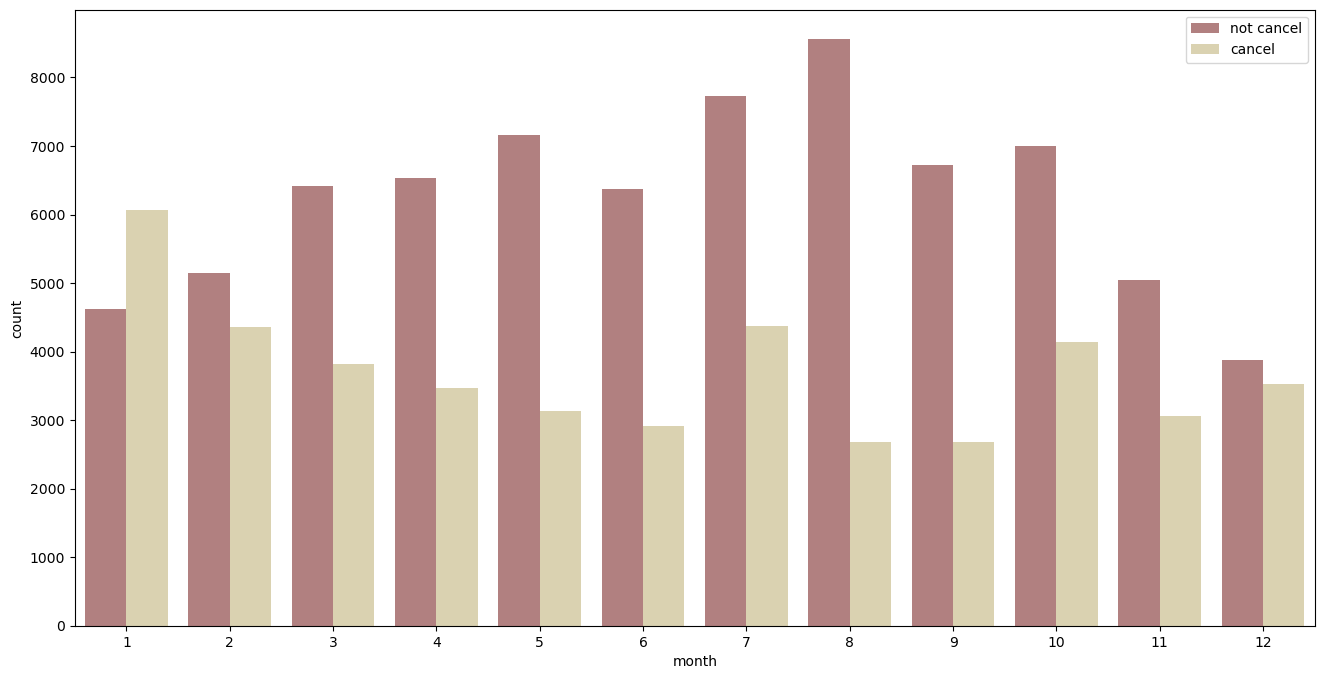

In [ ]:
df['month']= df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x='month',hue='is_canceled',data=df,palette='pink')
plt.legend(['not cancel','cancel'])

/tmp/ipykernel_136/2531765751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month',y='adr',data=addre,palette='pink' )


<Axes: xlabel='month', ylabel='adr'>

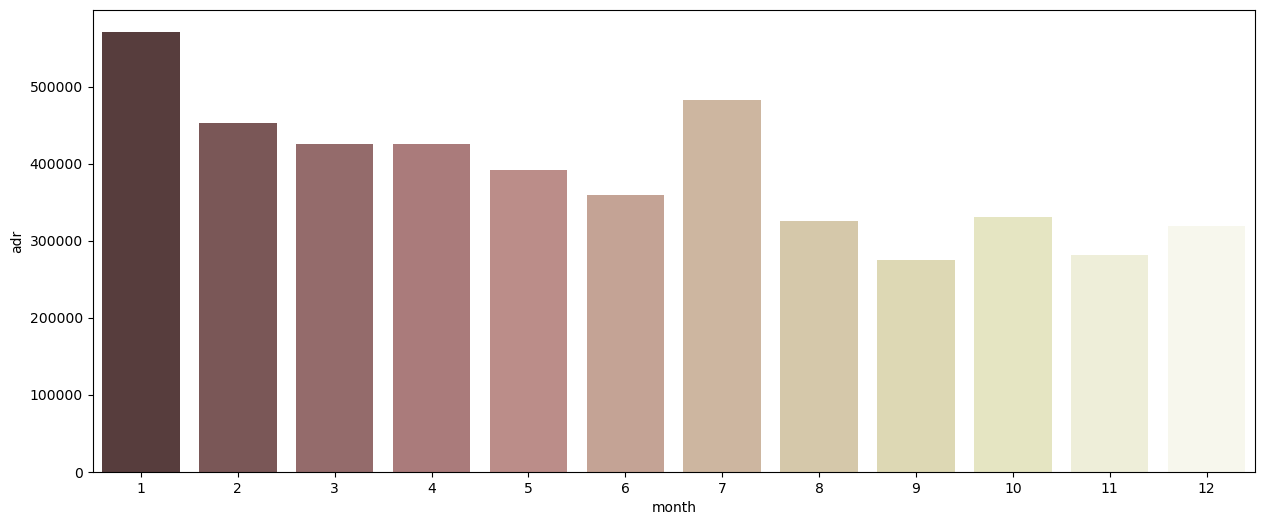

In [ ]:
plt.figure(figsize=(15,6))
addre=df[df['is_canceled']==1].groupby('month')['adr'].sum().reset_index()
sns.barplot(x='month',y='adr',data=addre,palette='pink' )        

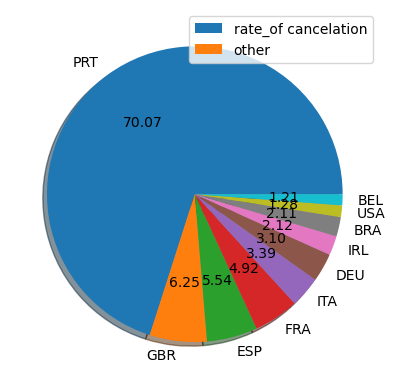

In [ ]:
cancel=df[df['is_canceled']==1]
country=cancel['country'].value_counts(normalize=True)[:10]
plt.pie(country,labels=country.index,autopct='%.2f',shadow=True)
plt.legend(['rate_of cancelation','other'])


## 🎯 Conclusion
The analysis highlights critical factors influencing hotel booking cancellations. 
Hotels can use these insights to optimize pricing strategies, improve booking policies, 
and minimize revenue loss.

## 👤 Author
Himanshu Rajput